# Exploratory Data Analysis

In [2]:
import pandas as pd
import os

folder = 'SSD2022AS2'
datasets = os.listdir(folder)
datasets = list(filter(lambda x: 'checkpoint' not in x, datasets))

df = pd.read_csv(os.path.join(folder, datasets[0]))
# Reading all input:
for f in datasets[1:]:
    df = pd.concat((df, pd.read_csv(os.path.join(folder, f))))
    
# dropping categorical feature
df = df.drop(['device'], axis=1)

# Assumption:

FPS does not contribute to the loss rate. We cannot quantify how much packets are in a single frame, and whether there are redundant ones. If we wish to find loss rate -> we should not consider FPS at all in our clusterization problem. If we follow paper, we need only RTT, to get RTT of packets, dropped frames and bitrate for the loss rate (if we somehow translate bitrate to the number of packets -> we are good to go). However, FPS will come in handy as a sanity check

# Problems with the dataset

## Problem 1. Small amount of errors in network

In [58]:
df.query('dropped_frames != 0').shape[0] / df.shape[0] * 100

1.7000234444972593

As we can see, there are only 1% of the data which contains the information about dropped frames

## Problem 1. 0 RTT, 0 dropped frames, non-zero bitrate

There are two cases. FPS == 0. That means all packets are lost:

In [31]:
df.query('dropped_frames == 0 and bitrate != 0 and RTT == 0 and FPS == 0')

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp
14803,607942c6-30bc-4021-a90d-159e3f43645a,668e8552-a853-4723-b953-a10578117c34,0.0,0.0,8781.0,0.0,2022-09-01 01:04:15
14804,607942c6-30bc-4021-a90d-159e3f43645a,668e8552-a853-4723-b953-a10578117c34,0.0,0.0,8874.0,0.0,2022-09-01 01:04:20
14805,607942c6-30bc-4021-a90d-159e3f43645a,668e8552-a853-4723-b953-a10578117c34,0.0,0.0,8930.0,0.0,2022-09-01 01:04:25
18451,61863e37-6a00-43f3-af83-41a9de50f26a,c809e3b7-b67f-4886-8172-744270ada962,0.0,0.0,1978.0,0.0,2022-09-01 09:22:00
23968,79d2966f-6312-403a-b583-f47c3c0dca6a,128bb779-6714-4ecc-93c3-2ad1cc49c938,0.0,0.0,15058.0,0.0,2022-09-01 10:54:35
...,...,...,...,...,...,...,...
52748,0edbdd3f-86c9-4b17-9d5b-8ac4484081c2,75b88d74-bc46-4320-a4ec-ba2f22ca1dcd,0.0,0.0,708.0,0.0,2022-09-30 14:05:10
52749,0edbdd3f-86c9-4b17-9d5b-8ac4484081c2,75b88d74-bc46-4320-a4ec-ba2f22ca1dcd,0.0,0.0,708.0,0.0,2022-09-30 14:05:15
52750,0edbdd3f-86c9-4b17-9d5b-8ac4484081c2,75b88d74-bc46-4320-a4ec-ba2f22ca1dcd,0.0,0.0,708.0,0.0,2022-09-30 14:05:20
52751,0edbdd3f-86c9-4b17-9d5b-8ac4484081c2,75b88d74-bc46-4320-a4ec-ba2f22ca1dcd,0.0,0.0,708.0,0.0,2022-09-30 14:05:25


In [36]:
print(f"""Percentage of such behaviour: {df.query('dropped_frames == 0 and bitrate != 0 and RTT == 0 and FPS == 0').shape[0] / df.shape[0] * 100}%""")

Percentage of such behaviour: 0.15838666171672208%


However, there is a prevalence of undefined behaviours. When FPS is not 0. We can not be entirely sure, how much of packets would be lost:

In [40]:
df.query('dropped_frames == 0 and bitrate != 0 and RTT == 0 and FPS != 0')

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp
554,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,0.0,30.0,5439.0,0.0,2022-09-01 10:35:20
555,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,0.0,30.0,5476.0,0.0,2022-09-01 10:35:25
556,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,0.0,30.0,5321.0,0.0,2022-09-01 10:35:30
557,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,0.0,30.0,5161.0,0.0,2022-09-01 10:35:35
558,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,0.0,30.0,2754.0,0.0,2022-09-01 10:35:40
...,...,...,...,...,...,...,...
150850,ff0bfd29-76ce-4d36-87f8-25315bc0af39,97240ab0-2a2d-45c9-8868-8a9dcec85b1b,0.0,22.0,427.0,0.0,2022-09-30 20:22:55
150851,ff0bfd29-76ce-4d36-87f8-25315bc0af39,97240ab0-2a2d-45c9-8868-8a9dcec85b1b,0.0,22.0,425.0,0.0,2022-09-30 20:23:00
150852,ff0bfd29-76ce-4d36-87f8-25315bc0af39,97240ab0-2a2d-45c9-8868-8a9dcec85b1b,0.0,22.0,427.0,0.0,2022-09-30 20:23:05
150853,ff0bfd29-76ce-4d36-87f8-25315bc0af39,97240ab0-2a2d-45c9-8868-8a9dcec85b1b,0.0,22.0,409.0,0.0,2022-09-30 20:23:10


In [41]:
print(f"""Percentage of such behaviour: {df.query('dropped_frames == 0 and bitrate != 0 and RTT == 0 and FPS != 0').shape[0] / df.shape[0] * 100}%""")

Percentage of such behaviour: 2.166583809616804%


For the sake of simplicity, let us filter out such sessions

## Problem 2. non-zero RTT, 0 dropped frames, zero bitrate

Let us take a look:

In [44]:
df.query('bitrate == 0 and dropped_frames == 0 and RTT != 0').head()

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp
2298,22b0351e-19d4-468a-bdbb-39aaa57a2b14,5b7de215-af6f-491c-8b73-292aa6c95160,0.0,0.0,0.0,3916.0,2022-09-01 08:29:45
4963,413f3a66-ca86-4204-ab62-53a581d7495b,e32e2f5a-5d12-42bc-9891-59b40661ff08,0.0,30.0,0.0,38.0,2022-09-01 01:32:10
11421,5be02825-fa61-4f81-a477-12cf0cc85782,9c389a1c-8945-43af-b374-7d73b3f1ba0f,0.0,25.0,0.0,2621.0,2022-09-01 03:13:40
12754,5be02825-fa61-4f81-a477-12cf0cc85782,09aaadc4-e06f-4ac2-8305-75a54aeb3201,0.0,48.0,0.0,166.0,2022-09-01 10:00:55
21037,6f00d147-d2bb-4f4b-9e24-de69e01c4c85,e50aeb81-b9a7-43db-8706-6661c4c01546,0.0,30.0,0.0,24131.0,2022-09-01 10:21:15


In [45]:
print(f"""Percentage of such behaviour: {df.query('bitrate == 0 and dropped_frames == 0 and RTT != 0').shape[0] / df.shape[0] * 100}%""")

Percentage of such behaviour: 0.0014126176995545546%


Such cases are also not so defined (What does it mean to have FPS, and not have bitrate? We could impute the loss rate to 100%, but not with non-zero fps) and pretty rare. As such, we can filter such sessions out

## Problem 3. 0 RTT, non-zero dropped frames, zero bitrate

Let us take a look:

In [47]:
df.query('bitrate == 0 and dropped_frames != 0 and RTT == 0')

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp
16077,607942c6-30bc-4021-a90d-159e3f43645a,668e8552-a853-4723-b953-a10578117c34,42.0,3.0,0.0,0.0,2022-09-01 02:59:35
16271,607942c6-30bc-4021-a90d-159e3f43645a,668e8552-a853-4723-b953-a10578117c34,1.0,12.0,0.0,0.0,2022-09-01 03:19:00
16273,607942c6-30bc-4021-a90d-159e3f43645a,668e8552-a853-4723-b953-a10578117c34,27.0,0.0,0.0,0.0,2022-09-01 03:19:35
16518,607942c6-30bc-4021-a90d-159e3f43645a,48da50c7-002e-4583-8ae2-198a28734776,92.0,0.0,0.0,0.0,2022-09-01 00:42:05
41412,d316573a-46df-4c23-b404-dde8790096c6,73646cb2-b0c7-4f0a-a7aa-961ed02fa3ef,1.0,0.0,0.0,0.0,2022-09-01 00:59:00
...,...,...,...,...,...,...,...
52464,0edbdd3f-86c9-4b17-9d5b-8ac4484081c2,75b88d74-bc46-4320-a4ec-ba2f22ca1dcd,1835009.0,0.0,0.0,0.0,2022-09-30 13:41:30
85230,522a0c6a-a7c7-463e-8a36-6b4dca07d3f0,2bbdfc02-4326-47f5-988b-68e13f67b522,120.0,1.0,0.0,0.0,2022-09-30 15:47:30
114197,97047eeb-5115-45d0-8c1e-7ad8ba7c6946,96187317-344a-4ef1-bd14-144189b04628,32.0,0.0,0.0,0.0,2022-09-30 23:54:55
137131,de13c872-029e-474b-8b58-b6a61c322300,bc324e4e-43b6-4827-a1cd-06fe4c27b208,71.0,0.0,0.0,0.0,2022-09-30 21:24:55


Such cases are clearly mistakes, because we can not have errors and no packets at the same time. We have to remove them from the data

## Problem 4. 0 RTT, non-zero dropped frames, non-zero bitrate

Let us take a look:

In [50]:
df.query('bitrate != 0 and dropped_frames != 0 and RTT == 0')

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp
577,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,41.0,0.0,5090.0,0.0,2022-09-01 10:37:15
613,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,37.0,15.0,6879.0,0.0,2022-09-01 10:40:15
626,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,1.0,20.0,8621.0,0.0,2022-09-01 10:41:20
632,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,41.0,0.0,4589.0,0.0,2022-09-01 10:41:50
717,052f1085-d37f-41c3-b003-5e7a2c64f075,0aabf12c-b17b-4709-9234-d016ac38b474,40.0,16.0,7066.0,0.0,2022-09-01 10:49:10
...,...,...,...,...,...,...,...
142076,f5202c7f-ff87-4fce-8d23-d7b340c9e000,d9364531-57fc-4094-bb05-829a5ae71d4f,23.0,0.0,1114.0,0.0,2022-09-30 23:32:25
142077,f5202c7f-ff87-4fce-8d23-d7b340c9e000,d9364531-57fc-4094-bb05-829a5ae71d4f,23.0,0.0,1114.0,0.0,2022-09-30 23:32:30
142078,f5202c7f-ff87-4fce-8d23-d7b340c9e000,d9364531-57fc-4094-bb05-829a5ae71d4f,23.0,0.0,1114.0,0.0,2022-09-30 23:32:35
142079,f5202c7f-ff87-4fce-8d23-d7b340c9e000,d9364531-57fc-4094-bb05-829a5ae71d4f,23.0,0.0,1114.0,0.0,2022-09-30 23:32:40


We can impute the RTT, but also thow away such cases altogether as there is not much

## Problem 5. non-zero RTT, zero dropped frames, non-zero bitrate

Actually, these are examples of stable network connection. No need to preprocess anything here

In [56]:
print(f"""Percentage of such behaviour: {df.query('bitrate != 0 and dropped_frames == 0 and RTT != 0').shape[0] / df.shape[0] * 100}%""")

Percentage of such behaviour: 95.74618679960804%


## Problem 6. non-zero RTT, non-zero dropped frames, zero bitrate

These are terrible examples and are errors. We need to filter out such sessions:

In [57]:
df.query('bitrate == 0 and dropped_frames != 0 and RTT != 0')

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp


At least there are none of theese

In [64]:
val bad = set(df.query('dropped_frames == 0 and bitrate != 0 and RTT == 0')['session_id'].tolist()).union()

{'84b8566a-4f67-4652-8ad7-3d271a21b315',
 '6729f5ac-8215-4716-8622-973da559067c',
 '4b5d7fbf-d193-4b4e-80ab-f2f9dc0f99c6',
 '27d8bb63-08d7-41e6-8609-dfbd619f538f',
 '2bb00e78-91b0-4d73-b73d-979e413e8dc9',
 '8307cfd3-97bb-4dfd-b921-5b7fbdb40c87',
 '338c9e13-688f-4ce2-ab2c-452a5a2e4c0e',
 '75b5ac14-4974-4899-b7ab-f7c0c336032a',
 '224ad65a-f1c3-4199-bd9b-5e12b7fd62c1',
 'c6bcfdf1-940c-4f86-bb0e-a70a08d7f468',
 'e5f60b2b-55e0-43ed-ab7f-18e4911eced3',
 '541b037e-6667-4879-98ea-6d406ce96a50',
 '7bd65907-f0d1-4907-96ba-93e7dd454b6e',
 '781823dc-6530-4d02-b15e-658398937bdf',
 'e72ef672-6955-4a0d-b3fb-eaf95ee12deb',
 'bd9ac6ab-7a73-4661-bd15-082589e438d8',
 '9faf0452-efa3-40cc-81d3-17753d892fb0',
 '0d56debf-946f-40bd-a1e3-af96ad4f222d',
 '212ffdb8-ddc6-407f-b874-f16e87b08070',
 '1f753778-4633-4043-83d9-97a9ac3cb87e',
 '05b287e6-cd2a-45f2-a34a-466e7d4721e8',
 'ad75b0f3-a6d6-43f5-984e-241ab631bd26',
 'cbafb40c-f576-44bb-990e-ebedbb18cfe1',
 'de716030-0b54-468e-be27-4cf692f7f194',
 'b9338db4-7140-

In [65]:
s1 = set(df.query('dropped_frames == 0 and bitrate != 0 and RTT == 0')['session_id'].tolist())
s2 = set(df.query('bitrate == 0 and dropped_frames == 0 and RTT != 0')['session_id'].tolist())
s3 = set(df.query('bitrate == 0 and dropped_frames != 0 and RTT == 0')['session_id'].tolist())
s4 = set(df.query('bitrate != 0 and dropped_frames != 0 and RTT == 0')['session_id'].tolist())

bad = list(s1.union(s2).union(s3).union(s4))

In [71]:
bad

['84b8566a-4f67-4652-8ad7-3d271a21b315',
 '6729f5ac-8215-4716-8622-973da559067c',
 '4b5d7fbf-d193-4b4e-80ab-f2f9dc0f99c6',
 '27d8bb63-08d7-41e6-8609-dfbd619f538f',
 '2bb00e78-91b0-4d73-b73d-979e413e8dc9',
 '8307cfd3-97bb-4dfd-b921-5b7fbdb40c87',
 '338c9e13-688f-4ce2-ab2c-452a5a2e4c0e',
 '75b5ac14-4974-4899-b7ab-f7c0c336032a',
 '224ad65a-f1c3-4199-bd9b-5e12b7fd62c1',
 'c6bcfdf1-940c-4f86-bb0e-a70a08d7f468',
 'e5f60b2b-55e0-43ed-ab7f-18e4911eced3',
 '541b037e-6667-4879-98ea-6d406ce96a50',
 '7bd65907-f0d1-4907-96ba-93e7dd454b6e',
 '781823dc-6530-4d02-b15e-658398937bdf',
 'e72ef672-6955-4a0d-b3fb-eaf95ee12deb',
 'bd9ac6ab-7a73-4661-bd15-082589e438d8',
 '9faf0452-efa3-40cc-81d3-17753d892fb0',
 '0d56debf-946f-40bd-a1e3-af96ad4f222d',
 '212ffdb8-ddc6-407f-b874-f16e87b08070',
 '1f753778-4633-4043-83d9-97a9ac3cb87e',
 '05b287e6-cd2a-45f2-a34a-466e7d4721e8',
 'ad75b0f3-a6d6-43f5-984e-241ab631bd26',
 'cbafb40c-f576-44bb-990e-ebedbb18cfe1',
 'de716030-0b54-468e-be27-4cf692f7f194',
 'b9338db4-7140-

In [75]:
df[~df.session_id.isin(bad)].shape[0] / df.shape[0]

0.30154778290891193

In [77]:
df[~df.session_id.isin(bad)].query('dropped_frames != 0').shape[0] / df[~df.session_id.isin(bad)].shape[0]

0.01381122386921375

For such cases we can consider that the network was bad, and RTT was not computed properly. Therefore, we can impute the maximal RTT here (If such cases are not filtered out in previous steps)

## Problem 2. non-zero RTT, 0 dropped frames, zero bitrate

Let us take a look at one of the users:

In [3]:
pd.read_csv('SSD2022AS2/raw_2022_09_02.csv').query("client_user_id == '61d10bed-37f7-42d1-8e83-8663c07d23f5'")

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp,device
68469,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,0.0,0.0,2022-09-02 22:30:55,Windows
68470,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,0.0,0.0,2022-09-02 22:31:00,Windows
68471,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,0.0,0.0,2022-09-02 22:31:05,Windows
68472,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,0.0,0.0,2022-09-02 22:31:10,Windows
68473,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,1.208716e+09,0.0,0.0,0.0,2022-09-02 22:31:15,Windows
...,...,...,...,...,...,...,...,...
69514,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,475.0,0.0,2022-09-02 23:59:40,Windows
69515,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,433.0,0.0,2022-09-02 23:59:45,Windows
69516,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,135.0,0.0,2022-09-02 23:59:50,Windows
69517,61d10bed-37f7-42d1-8e83-8663c07d23f5,6c09703d-3b90-461c-8ee7-d380b3a97299,0.000000e+00,0.0,164.0,0.0,2022-09-02 23:59:55,Windows


As we can see, there are several instances of the time series, when we have 0 FPS, 0 dropped_frames, 0 RTT, 0 RTT. For such cases, we can set the maximal dropped frames, maximal bitrate, maximal RTT to indicate that something is inherently wrong with the data (or remove them altogether)

In [32]:
# Printing the head:
df.query('dropped_frames == 1952805600')

,client_user_id,session_id,dropped_frames,FPS,bitrate,RTT,timestamp
22395,61d10bed-37f7-42d1-8e83-8663c07d23f5,516c828f-9370-4dad-bd2b-a0ee83d4508a,1.952806e+09,0.0,1501.0,0.0,2022-09-05 01:20:25
22402,61d10bed-37f7-42d1-8e83-8663c07d23f5,516c828f-9370-4dad-bd2b-a0ee83d4508a,1.952806e+09,0.0,3644.0,0.0,2022-09-05 01:21:00
22403,61d10bed-37f7-42d1-8e83-8663c07d23f5,516c828f-9370-4dad-bd2b-a0ee83d4508a,1.952806e+09,0.0,1721.0,0.0,2022-09-05 01:21:05
22406,61d10bed-37f7-42d1-8e83-8663c07d23f5,516c828f-9370-4dad-bd2b-a0ee83d4508a,1.952806e+09,0.0,309.0,0.0,2022-09-05 01:21:30
24918,61d10bed-37f7-42d1-8e83-8663c07d23f5,4c6a4d30-b557-42e0-934c-4d989babc8d1,1.952806e+09,0.0,0.0,0.0,2022-09-08 00:53:30
76515,61d10bed-37f7-42d1-8e83-8663c07d23f5,b4575edb-d027-46ac-9b42-fa610c0559e9,1.952806e+09,0.0,0.0,0.0,2022-09-12 23:31:45
76516,61d10bed-37f7-42d1-8e83-8663c07d23f5,b4575edb-d027-46ac-9b42-fa610c0559e9,1.952806e+09,0.0,8152.0,0.0,2022-09-12 23:31:50
76517,61d10bed-37f7-42d1-8e83-8663c07d23f5,b4575edb-d027-46ac-9b42-fa610c0559e9,1.952806e+09,0.0,7777.0,0.0,2022-09-12 23:31:55
76518,61d10bed-37f7-42d1-8e83-8663c07d23f5,b4575edb-d027-46ac-9b42-fa610c0559e9,1.952806e+09,0.0,7761.0,0.0,2022-09-12 23:32:00
76519,61d10bed-37f7-42d1-8e83-8663c07d23f5,b4575edb-d027-46ac-9b42-fa610c0559e9,1.952806e+09,0.0,8368.0,0.0,2022-09-12 23:32:05


There are also instances of enormous amounts of dropped frames. As such, we need to detect the outliers for each numerical column in the dataset and remove such sessions as well

In [6]:
df.describe()

,dropped_frames,FPS,bitrate,RTT
count,4.035062e+06,4.035062e+06,4.035062e+06,4.035062e+06
mean,2.606450e+05,3.232106e+01,7.178104e+03,5.777859e+01
std,1.946947e+07,1.087616e+01,6.310529e+03,2.506774e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.800000e+01,2.137000e+03,1.200000e+01
50%,0.000000e+00,3.000000e+01,5.971000e+03,2.900000e+01
75%,0.000000e+00,3.100000e+01,1.011200e+04,5.600000e+01
max,1.952806e+09,1.000000e+03,1.154460e+05,6.389200e+04


In dataset description, the highest std of dropped frames too big, which further explains the necessity to filter outliers. Only after this step, we can impute the data, as explained above

In [ ]:
df.query('FPS == 0 and FPS == 0 and dropped_frames == 0 and RTT == 0')

In [9]:
df.corr()

,dropped_frames,FPS,bitrate,RTT
dropped_frames,1.000000,-0.039784,-0.006857,-0.003086
FPS,-0.039784,1.000000,0.193001,-0.050183
bitrate,-0.006857,0.193001,1.000000,-0.037840
RTT,-0.003086,-0.050183,-0.037840,1.000000


Existing numerical features are not correlated, therefore, we should keep them all

In [3]:
df.iloc[1]

client_user_id    0302549e-5522-43e5-b2f2-0b470932a6fd
session_id        b3aebc80-ff28-4569-bd18-2ace692f668e
dropped_frames                                     0.0
FPS                                               30.0
bitrate                                         3418.0
RTT                                               66.0
timestamp                          2022-09-01 00:00:05
Name: 1, dtype: object

In [79]:
# Now we need to group our data:
groupped = df[~df.session_id.isin(bad)].groupby(by=['client_user_id', 'session_id'])

In [80]:
# Applying sliding windows to the data:
# we make use of the fact that the data is already sorted for us:
import numpy as np

w_size = 50
slides = []
for k, v in groupped:
    # Getting our groups to numpy
    numpy_data = v.drop(['client_user_id', 'session_id', 'bitrate', 'timestamp'], axis=1).to_numpy()
    # identifying seq length
    seq_length = numpy_data.shape[0]
    # getting windows. Notice that the last window is actually dropped, as it has length < 24
    observations = [numpy_data[i*w_size:(i+1)*w_size, :] for i in range(seq_length // w_size)]
    # accumulating slides
    slides+=observations
    
slides = np.array(slides)

In [81]:
def loss_rate(lost, fps):
    if lost == fps == 0:
        return 1.0
    else:
        return lost / 5 * (lost / 5 + fps)

In [82]:
slides.shape

(23489, 50, 3)

In [83]:
# Map packets to the numpy array with features [loss_rate, rtt, rtt_std]
minimal = df['RTT'].min()
maximal = df['RTT'].max()
mapped = np.array(list(map(lambda x: (loss_rate(np.sum(x[:, 0]), np.sum(x[:, 1])), np.mean((x[:, 2] - minimal) / (maximal - minimal)), np.std((x[:, 2] - minimal) / (maximal - minimal))), slides)))

In [84]:
mapped

array([[0.00000000e+00, 6.15100482e-04, 1.58944691e-04],
       [0.00000000e+00, 6.45464221e-04, 1.72721254e-04],
       [0.00000000e+00, 4.35109247e-05, 6.48353947e-06],
       ...,
       [0.00000000e+00, 1.44149502e-03, 2.19013533e-04],
       [0.00000000e+00, 4.72735241e-03, 2.46697224e-03],
       [0.00000000e+00, 3.87247230e-03, 5.19486271e-04]])

In [86]:
from matplotlib import pyplot as plt

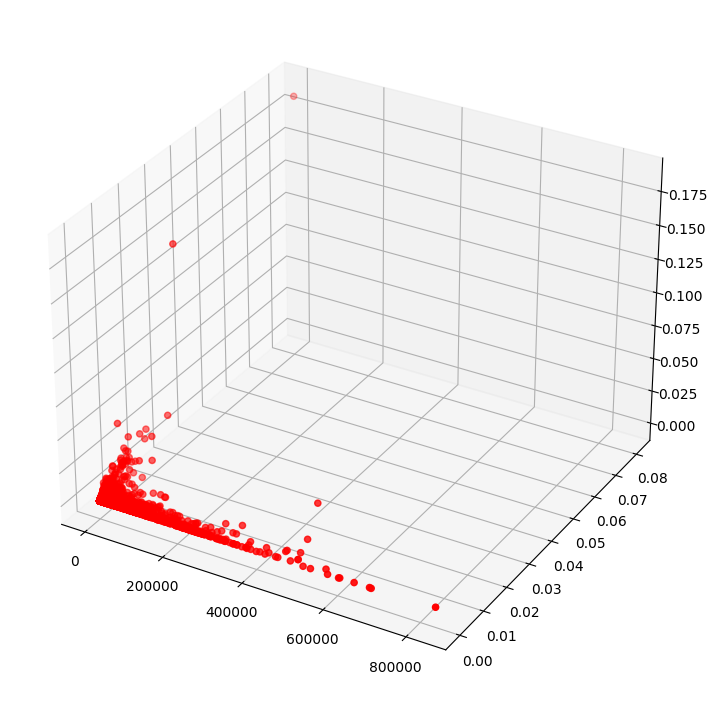

In [87]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(133, projection='3d')
ax.scatter(mapped[:, 0], mapped[:, 1], mapped[:, 2], color="red")

plt.show()

[]

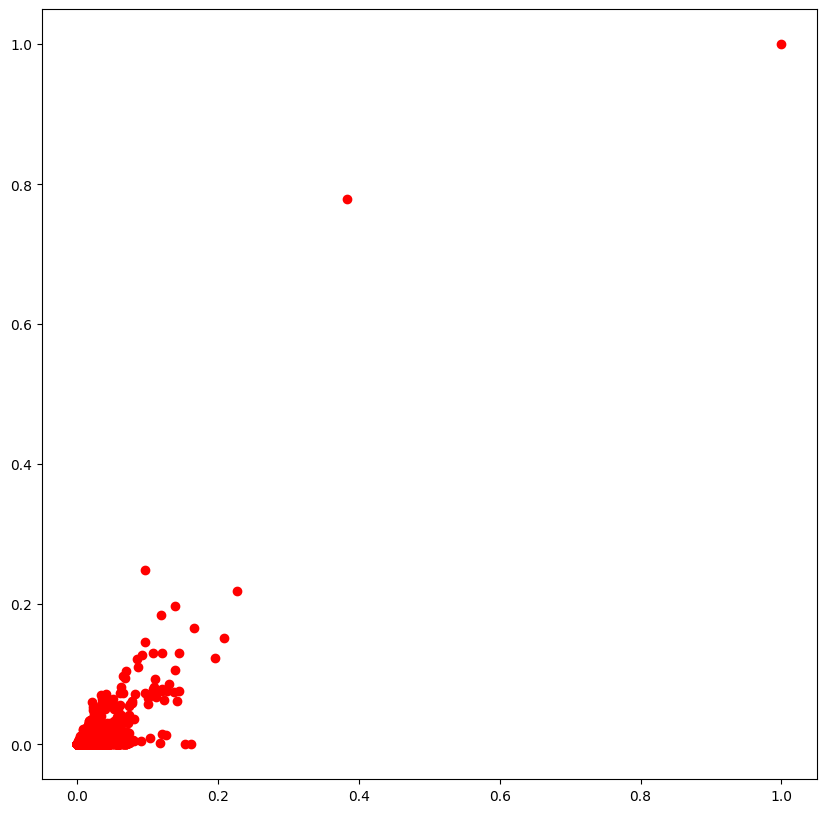

In [88]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
plt.scatter((mapped[:, 1] - min(mapped[:, 1])) / (max(mapped[:, 1]) - min(mapped[:, 1])), (mapped[:, 2] - min(mapped[:, 2])) / (max(mapped[:, 2]) - min(mapped[:, 2])), color="red")
plt.plot()

[]

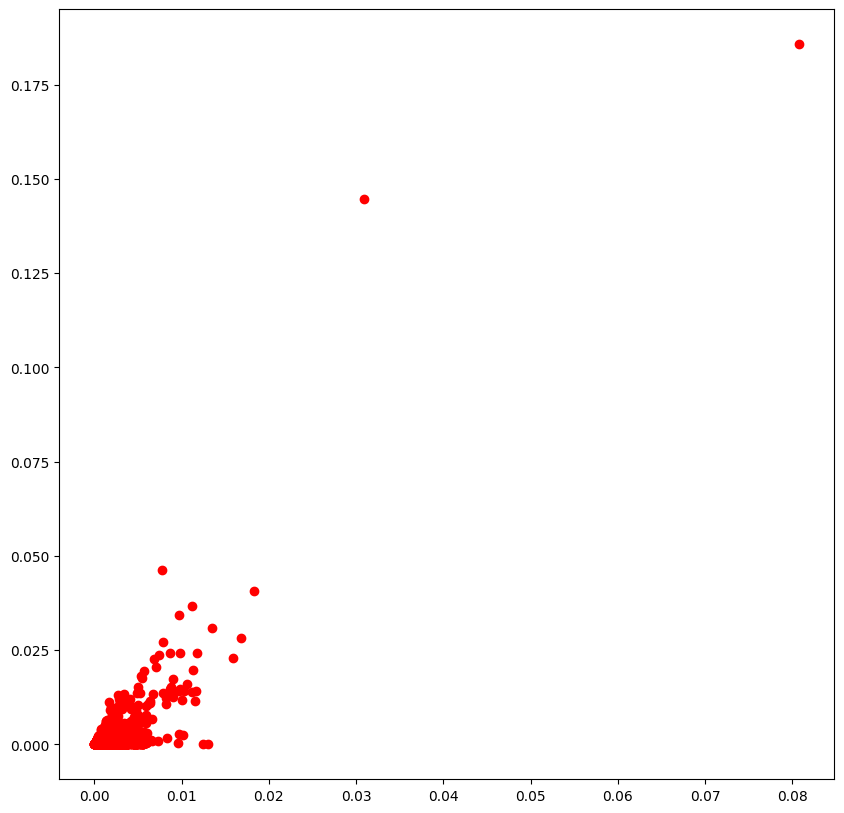

In [89]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(mapped[:, 1], mapped[:, 2], color="red")
plt.plot()

In [ ]:
# Now we need to group our data:
groupped = df[~df.session_id.isin(bad)].groupby(by=['client_user_id', 'session_id'])

w_size = 50
slides = []
for k, v in groupped:
    # Getting our groups to numpy
    numpy_data = v.drop(['client_user_id', 'session_id', 'bitrate', 'timestamp'], axis=1).to_numpy()
    # identifying seq length
    seq_length = numpy_data.shape[0]
    # getting windows. Notice that the last window is actually dropped, as it has length < 24
    observations = [numpy_data[i*w_size:(i+1)*w_size, :] for i in range(seq_length // w_size)]
    # accumulating slides
    slides+=observations
    
slides = np.array(slides)

# Map packets to the numpy array with features [loss_rate, rtt, rtt_std]
minimal = df['RTT'].min()
maximal = df['RTT'].max()
mapped = np.array(list(map(lambda x: (loss_rate(np.sum(x[:, 0]), np.sum(x[:, 1])), np.mean((x[:, 2] - minimal) / (maximal - minimal)), np.std((x[:, 2] - minimal) / (maximal - minimal))), slides)))

fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(133, projection='3d')
ax.scatter(mapped[:, 0], mapped[:, 1], mapped[:, 2], color="red")

plt.show()

In [104]:
# and there we have our data points:
slides.shape

(36634, 100, 3)

In [76]:
# Let us save them just in case:
# will save it to (166128, 96)
np.savetxt("data.txt", slides.reshape(slides.shape[0], -1))

In [1]:
# Now, lets load the data to refresh our Ram from a txt and reshape it back:
import numpy as np

data = np.loadtxt("data.txt")

In [2]:
# And, reconstruct the original shape
data = data.reshape(data.shape[0], 24, 4)

In [3]:
data.shape

(166128, 24, 4)

In [4]:
# Now, let us reduce the shape to (N, 24, 1)
from sklearn.preprocessing import normalize

data = data.reshape(data.shape[0]*data.shape[1], data.shape[2])
# Normalizing, so that taking a norm of a vector of features would not
# be affected by scale of data. It will be usable later
normalized = normalize(data).reshape(data.shape[0] // 24, 24, data.shape[1])

In [5]:
# Let us find the euclidian norm to transfrom data to (N, 1):
data = np.linalg.norm(normalized, axis=2)
data.shape

(166128, 24)

In [6]:
# Now, let us finally use PCA:
from sklearn.decomposition import PCA

var = []

for i in range(24):
    pca = PCA(n_components=i)
    pca.fit(data)
    var.append(np.sum(pca.explained_variance_ratio_))

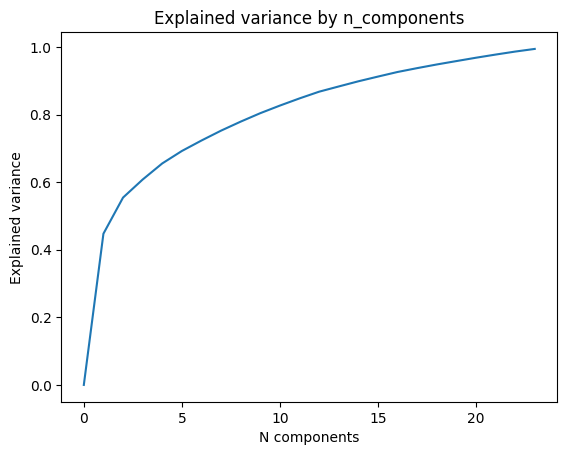

In [7]:
from matplotlib import pyplot as plt

plt.plot(range(24), var)
plt.title('Explained variance by n_components')
plt.xlabel('N components')
plt.ylabel('Explained variance')
plt.show()

In [8]:
# Lets keep 10 components, as they explaint 80% of variance:

reduced = PCA(n_components=10).fit_transform(data)
print(reduced.shape)

(166128, 10)


In [9]:
# Now, let us apply k-means clustering:
from sklearn.cluster import KMeans

sq_dist = []
for i in range(1, 50):
    km = KMeans(n_clusters=i)
    km.fit(reduced)
    sq_dist.append(km.inertia_)

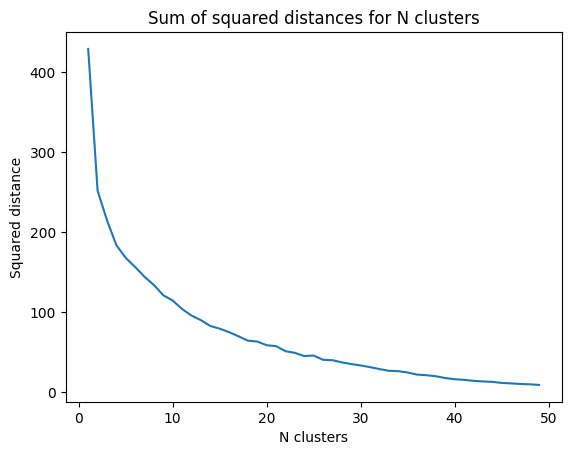

In [10]:
plt.plot(range(1, 50), sq_dist)
plt.title('Sum of squared distances for N clusters')
plt.xlabel('N clusters')
plt.ylabel('Squared distance')
plt.show()

In [11]:
# Elbow occurs at approximately 18 clusters, so we will use this amount:

k_means_pca = KMeans(n_clusters = 18)

k_means_pca.fit(reduced)

KMeans(n_clusters=18)

In [12]:
from sklearn.metrics.pairwise import euclidean_distances
# Calculating metrics:

# within-class variance:
pca_intra = k_means_pca.inertia_
# inter cluster distance
pca_mean = euclidean_distances(k_means_pca.cluster_centers_).mean()
pca_std = euclidean_distances(k_means_pca.cluster_centers_).std()

In [13]:
print("Inter cluster distance mean, std: ", pca_mean, pca_std)
print("Sum of within cluster variance: ", pca_intra)

Inter cluster distance mean, std:  2.5396433169503783 1.1477107469467764
Sum of within cluster variance:  67.33161566549165


## MDS

In [14]:
data.shape

(166128, 24)

In [15]:
# Next, we will apply MDS, using the same logic for going
# from (N, 4) -> (N, 1)
from sklearn.manifold import MDS

stress = []

for i in range(1, 10):
    mds = MDS(n_components=i)
    # Reducing the data points, because I dont have enough ram
    mds.fit(data[:5000, :])
    stress.append(np.sum(mds.stress_))

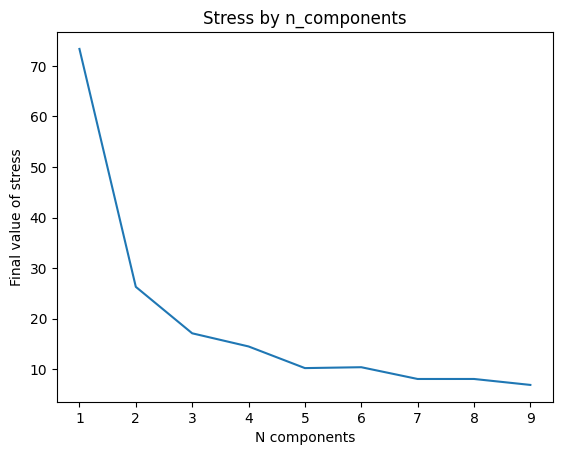

In [16]:
from matplotlib import pyplot as plt

plt.plot(range(1, 10), stress)
plt.title('Stress by n_components')
plt.xlabel('N components')
plt.ylabel('Final value of stress')
plt.show()

In [17]:
# Lets keep 4 components, as tehy explaint 80% of variance:

reduced = MDS(n_components=4).fit_transform(data[:5000, :])
print(reduced.shape)

(5000, 4)


In [18]:
# Now, let us apply k-means clustering:
from sklearn.cluster import KMeans

sq_dist = []
for i in range(1, 50):
    km = KMeans(n_clusters=i)
    km.fit(reduced)
    sq_dist.append(km.inertia_)

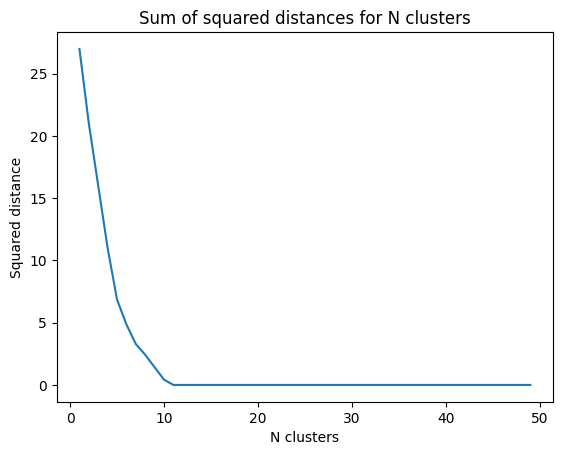

In [19]:
plt.plot(range(1, 50), sq_dist)
plt.title('Sum of squared distances for N clusters')
plt.xlabel('N clusters')
plt.ylabel('Squared distance')
plt.show()

In [20]:
# Elbow occurs at approximately 8 clusters, so we will use this amount:

k_means_mds = KMeans(n_clusters = 8)

k_means_mds.fit(reduced)

KMeans()

In [21]:
from sklearn.metrics.pairwise import euclidean_distances
# Calculating metrics:

# within-class variance:
mds_intra = k_means_mds.inertia_
# inter cluster distance
mds_mean = euclidean_distances(k_means_mds.cluster_centers_).mean()
mds_std = euclidean_distances(k_means_mds.cluster_centers_).std()

In [22]:
print("Inter cluster distance mean, std: ", mds_mean, pca_std)
print("Sum of within cluster variance: ", mds_intra)

Inter cluster distance mean, std:  2.1097725472475304 1.1477107469467764
Sum of within cluster variance:  2.420852403053711


## DCAE

In [23]:
# I will be following 2 guides:
# https://machinelearningmastery.com/how-to-develop-convolutional-neural-network-models-for-time-series-forecasting/
# https://blog.keras.io/building-autoencoders-in-keras.html

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

### Model definition

In [25]:
inp = keras.Input(shape=(24, 4))
# Encoder
# Our sequence length obviously prevents us from adding more layers. 
# I would prefer not to use padding
encoded = layers.Conv1D(filters=32, kernel_size=10, activation='sigmoid')(inp)
encoded = layers.Conv1D(filters=64, kernel_size=10, activation='sigmoid')(encoded)
encoded = layers.Flatten()(encoded)
encoded = layers.Dense(384, activation='sigmoid')(encoded)
encoded = layers.Dense(5, activation='sigmoid')(encoded)

encoder = keras.Model(inp, encoded)

decoded = layers.Dense(384, activation='sigmoid')(encoded)
decoded = layers.Reshape((6, 64))(decoded)
decoded = layers.Conv1DTranspose(64, kernel_size=10, activation='sigmoid')(decoded)
decoded = layers.Conv1DTranspose(32, kernel_size=10, activation='sigmoid')(decoded)
decoded = layers.Conv1DTranspose(4, kernel_size=1, activation='sigmoid')(decoded)

autoencoder = keras.Model(inp, decoded)

### Train, test split

In [26]:
from sklearn.model_selection import train_test_split
# We dont need y in autoencoder
x_train, x_test, _, _ = train_test_split(normalized, normalized)

### Training model

In [27]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
# Sorry for cringe (no cross val, etc...)
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)             
               )

Epoch 1/10
487/487 [==============================] - 16s 31ms/step - loss: 0.0106 - val_loss: 0.0080
Epoch 2/10
487/487 [==============================] - 16s 32ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 3/10
487/487 [==============================] - 16s 32ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 4/10
487/487 [==============================] - 16s 32ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 5/10
487/487 [==============================] - 15s 31ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 6/10
487/487 [==============================] - 16s 33ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 7/10
487/487 [==============================] - 16s 34ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 8/10
487/487 [==============================] - 17s 34ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 9/10
487/487 [==============================] - 16s 33ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 10/10
487/487 [==============================] - 16s 33ms/step - loss: 0.007

In [28]:
# Acquiring data
ae_data = encoder.predict(normalized)

5192/5192 [==============================] - 25s 5ms/step


In [29]:
# Now, let us apply k-means clustering:
sq_dist = []
for i in range(1, 50):
    km = KMeans(n_clusters=i)
    km.fit(ae_data)
    sq_dist.append(km.inertia_)

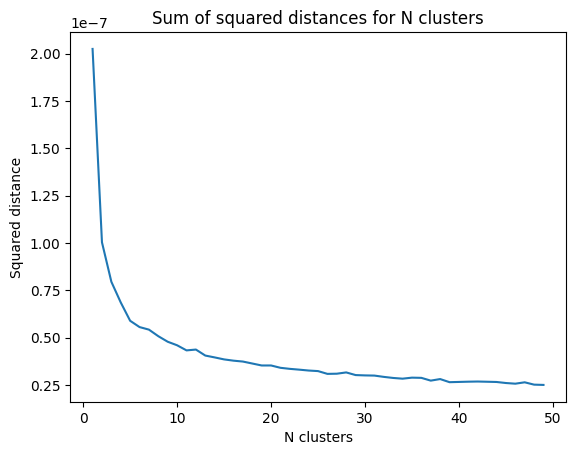

In [30]:
plt.plot(range(1, 50), sq_dist)
plt.title('Sum of squared distances for N clusters')
plt.xlabel('N clusters')
plt.ylabel('Squared distance')
plt.show()

In [31]:
# Elbow occurs at approximately 9 clusters, so we will use this amount:

k_means_ae = KMeans(n_clusters = 9)

k_means_ae.fit(ae_data)

KMeans(n_clusters=9)

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
# Calculating metrics:

# within-class variance:
ae_intra = k_means_ae.inertia_
# inter cluster distance
ae_mean = euclidean_distances(k_means_ae.cluster_centers_).mean()
ae_std = euclidean_distances(k_means_ae.cluster_centers_).std()

In [33]:
print("Inter cluster distance mean, std: ", ae_mean, ae_std)
print("Sum of within cluster variance: ", ae_intra)

Inter cluster distance mean, std:  4.5570864e-06 2.9981816e-06
Sum of within cluster variance:  4.8270546670892145e-08


## New model

In [34]:
# Thats gonna be hard to beat, but I will try
# I will try and get more dimensions to the embeddings, 
# as well as add some more dense layers in-between

inp_new = keras.Input(shape=(24, 4))
# Encoder
# Our sequence length obviously prevents us from adding more layers. 
# I would prefer not to use padding
encoded_new = layers.Conv1D(filters=32, kernel_size=10, activation='sigmoid')(inp_new)
encoded_new = layers.Conv1D(filters=64, kernel_size=10, activation='sigmoid')(encoded_new)
encoded_new = layers.Flatten()(encoded_new)
encoded_new = layers.Dense(384, activation='sigmoid')(encoded_new)
encoded_new = layers.Dense(192, activation='sigmoid')(encoded_new)
encoded_new = layers.Dense(8, activation='sigmoid')(encoded_new)

encoder_new = keras.Model(inp, encoded)

decoded_new = layers.Dense(192, activation='sigmoid')(encoded_new)
decoded_new = layers.Dense(384, activation='sigmoid')(encoded_new)
decoded_new = layers.Reshape((6, 64))(decoded_new)
decoded_new = layers.Conv1DTranspose(64, kernel_size=10, activation='sigmoid')(decoded_new)
decoded_new = layers.Conv1DTranspose(32, kernel_size=10, activation='sigmoid')(decoded_new)
decoded_new = layers.Conv1DTranspose(4, kernel_size=1, activation='sigmoid')(decoded_new)

autoencoder_new = keras.Model(inp, decoded)

### Training model

In [35]:
# Reusing train/test data we had:
autoencoder_new.compile(optimizer='adam', loss='mean_squared_error')
# Sorry for cringe (no cross val, etc...)
autoencoder_new.fit(x_train, x_train,
                epochs=3,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)             
               )

Epoch 1/3
487/487 [==============================] - 14s 26ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 2/3
487/487 [==============================] - 12s 24ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 3/3
487/487 [==============================] - 13s 26ms/step - loss: 0.0078 - val_loss: 0.0079


In [36]:
# Acquiring data
ae_new_data = encoder_new.predict(normalized)

5192/5192 [==============================] - 27s 5ms/step


### Applying k means

In [37]:
# Now, let us apply k-means clustering:
sq_dist = []
for i in range(1, 50):
    km = KMeans(n_clusters=i)
    km.fit(ae_new_data)
    sq_dist.append(km.inertia_)

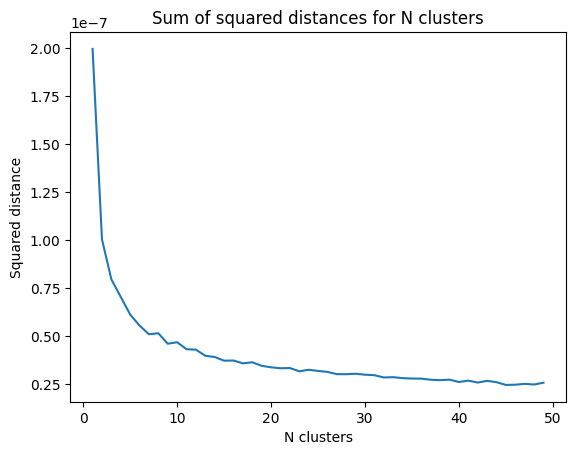

In [38]:
plt.plot(range(1, 50), sq_dist)
plt.title('Sum of squared distances for N clusters')
plt.xlabel('N clusters')
plt.ylabel('Squared distance')
plt.show()

In [47]:
# Elbow occurs at approximately 6 clusters, so we will use this amount:

k_means_ae_new = KMeans(n_clusters = 6)

k_means_ae_new.fit(ae_new_data)

KMeans(n_clusters=6)

In [48]:
from sklearn.metrics.pairwise import euclidean_distances
# Calculating metrics:

# within-class variance:
ae_new_intra = k_means_ae_new.inertia_
# inter cluster distance
ae_new_mean = euclidean_distances(k_means_ae_new.cluster_centers_).mean()
ae_new_std = euclidean_distances(k_means_ae_new.cluster_centers_).std()

In [49]:
print("Inter cluster distance mean, std: ", ae_new_mean, ae_new_std)
print("Sum of within cluster variance: ", ae_new_intra)

Inter cluster distance mean, std:  4.867344e-06 3.6737447e-06
Sum of within cluster variance:  5.6247650093155244e-08


## Results

In [50]:
# Now, let us observe the total results of our models:
    
print(f"PCA: intra - ${pca_intra}, eucl_mean - {pca_mean}, eucl_std - {pca_std}")
print(f"MDS: intra - ${mds_intra}, eucl_mean - {mds_mean}, eucl_std - {mds_std}")
print(f"DCAE: intra - ${ae_intra}, eucl_mean - {ae_mean}, eucl_std - {ae_std}")
print(f"DCAE: intra - ${ae_new_intra}, eucl_mean - {ae_new_mean}, eucl_std - {ae_new_std}")


PCA: intra - $67.33161566549165, eucl_mean - 2.5396433169503783, eucl_std - 1.1477107469467764
MDS: intra - $2.420852403053711, eucl_mean - 2.1097725472475304, eucl_std - 1.0677328286950158
DCAE: intra - $4.8270546670892145e-08, eucl_mean - 4.55708641311503e-06, eucl_std - 2.998181571456371e-06
DCAE: intra - $5.6247650093155244e-08, eucl_mean - 4.867344159720233e-06, eucl_std - 3.6737446862389334e-06
